___
# NLP (Natural Language Processing) with Python

This is the notebook that goes along with the NLP video lecture!

In this lecture we will discuss a higher level overview of the basics of Natural Language Processing, which basically consists of combining machine learning techniques with text, and using math and statistics to get that text in a format that the machine learning algorithms can understand!

Once you've completed this lecture you'll have a project using some Yelp Text Data!
    
**Requirements: You will need to have NLTK installed, along with downloading the corpus for stopwords. To download everything with a conda installation, run the cell below. Or reference the full video lecture**

## Get the Data

We'll be using a dataset from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)! This dataset is already located in the folder for this section.

The file we are using contains a collection of more than 5 thousand SMS phone messages. You can check out the **readme** file for more info.

Let's go ahead and use rstrip() plus a list comprehension to get a list of all the lines of text messages:

In [8]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 3px  black solid !important;
  color: black !important;
}
# For having gridlines 

In [1]:
import nltk

In [ ]:
# nltk.download_shell()

In [2]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

A collection of texts is also sometimes called "corpus". Let's print the first ten messages and number them using **enumerate**:

In [3]:
messages[5]

"spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv"

- Collection of texts is called corpus. Let's print first 10 messages and number them using enumerate.

In [4]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

- If you notice carefully, you can see that due to spacing this is a tab separated value TSV file.
- Here first column is label, whether message is ham/spam and second column is message itself.
- if we do messages[0] we see that \t means it is in a tab separated format.
- Instead of parsing the TSV file manually with Python we can just use our Pandas knowledge to do this.

In [5]:
import pandas as pd

In [6]:
# We will use read_csv and use sep argument to be tab and specify column names.
messages = pd.read_csv('./smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [7]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

Let's check out some of the stats with some plots and the built-in methods in pandas!

In [9]:
messages.describe() # To check stats
# Notice how there are less unique messages vs actual message count. There are repeated spam messages maybe.
# Now we do groupby to use the describe method by the actual label. This way we can begin to think about features which
# separates ham from spam.

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

As we continue our analysis we want to start thinking about the features we are going to be using. This goes along with the general idea of [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering). The better your domain knowledge on the data, the better your ability to engineer more features from it. Feature engineering is a very large part of spam detection in general. I encourage you to read up on the topic!

Let's make a new column to detect how long the text messages are:

In [13]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Data Visualization
Let's visualize this! Let's do the imports:

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Text(0.5, 0, 'Number of chars in message')

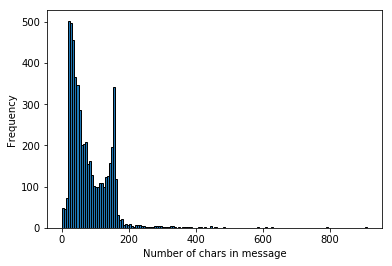

In [22]:
# messages['length'].plot.hist(bins = 50)
# messages['length'].plot.hist(bins = 100)
messages['length'].plot.hist(bins = 150) # As we increase number of bins we see a *bimodal behaviour.
# To get more detail
plt.rcParams["patch.force_edgecolor"] = True
plt.xlabel("Number of chars in message")

[For getting border between bars](https://stackoverflow.com/questions/43080259/no-outlines-on-bins-of-matplotlib-histograms-or-seaborn-distplots) <br />
[Bimodal](https://www.statisticshowto.datasciencecentral.com/what-is-a-bimodal-distribution/)

Play around with the bin size! Looks like text length may be a good feature to think about! Let's try to explain why the x-axis goes all the way to 1000ish, this must mean that there is some really long message!
- We notice that x axis goes all they way till 1k chars.

In [23]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

- We see that maximum length is 910 characters.
- Now we find that message.

In [26]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

- Alright, enough about that, shifting gears now and focusing on trying to find the relation between message length and text being ham or spam.
- Making a histogram of messages.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0B56C3F28>,
      dtype=object)

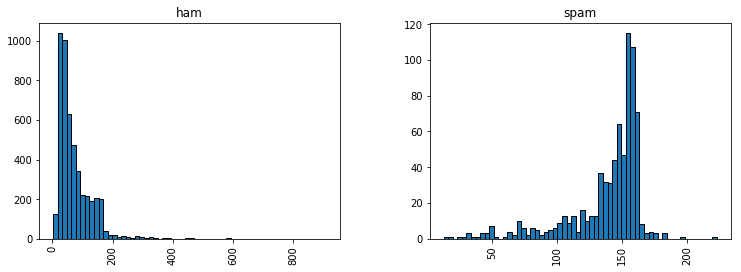

In [27]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))
# Make subplots based off of column using Pandas built-in Data Visualisation

- Just from basic EDA we can tell that spam messages tend to have more characters. 
- Ham messages mostly end before 200 character limit. Centered around 50 characters.
- Spam messages tend to center around 150 characters.
- So, we can say that length is a good feature to distinguish ham and spam messages.
- Now let's begin to process the data so we can eventually use it with SciKit Learn!